# 2.	Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)
base_score = base_model.score(X_test, y_test)
print(f"Базовая точность модели: {base_score:.2f}")

cv_scores = cross_val_score(base_model, X_train, y_train, cv=5)
print(f"Средняя точность на кросс-валидации: {cv_scores.mean():.2f}")

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_score = best_model.score(X_test, y_test)
print(f"Точность модели с лучшими параметрами: {best_score:.2f}")

y_pred = best_model.predict(X_test)
print("Классификационный отчет:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.2f}")


Базовая точность модели: 0.96
Средняя точность на кросс-валидации: 0.96
Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Точность модели с лучшими параметрами: 0.96
Классификационный отчет:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 1.00


# 3.	Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.

<h1 style="color: blue;">Создание датасета</h1>


In [24]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

cities = ['Bishkek', 'Almaty', 'Moscow', 'London', 'New York']
vacation_types = ['Shopping', 'Beach holiday']
transport_types = ['auto', 'plane']
target_cities = ['London', 'Moscow', 'Bishkek', 'New York']

data = []

for _ in range(1000):
    salary = random.randint(30000, 60000)  
    city = random.choice(cities)  
    age = random.randint(30, 50)  
    vacation_prefer = random.choice(vacation_types) 
    transport_prefer = random.choice(transport_types)  
    target = random.choice(target_cities)  

    data.append([salary, city, age, vacation_prefer, transport_prefer, target])

df = pd.DataFrame(data, columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])

csv_file_path = 'generated_vacation_data.csv'
df.to_csv(csv_file_path, index=False)


<h1 style="color: blue;">Обучение модели</h1>


In [43]:
df = pd.read_csv(csv_file_path)

df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'], drop_first=True)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)  

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_encoded)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Точность модели: {accuracy:.4f}")

print("\nКлассификационный отчет:\n", classification_report(y_test_encoded, y_pred))
print("\nМатрица ошибок:\n", confusion_matrix(y_test_encoded, y_pred))


random_data = {
    'salary': [random.randint(30000, 120000)],
    'age': [random.randint(30, 65)],
    'city_Almaty': [random.choice([0, 1])],
    'city_Bishkek': [random.choice([0, 1])],
    'city_London': [random.choice([0, 1])],
    'city_Moscow': [random.choice([0, 1])],
    'city_New York': [random.choice([0, 1])],
    'vacation_prefer_Beach holiday': [random.choice([0, 1])],
    'vacation_prefer_Shopping': [random.choice([0, 1])],
    'transport_prefer_auto': [random.choice([0, 1])],
    'transport_prefer_plane': [random.choice([0, 1])],
}

random_df = pd.DataFrame(random_data)

print("\nСгенерированные параметры для случайных данных:")
for key, value in random_data.items():
    print(f"{key}: {value[0]}")

random_df = pd.get_dummies(random_df, columns=['city_Almaty', 'city_Bishkek', 'city_London', 'city_Moscow', 'city_New York', 'vacation_prefer_Beach holiday', 'vacation_prefer_Shopping', 'transport_prefer_auto', 'transport_prefer_plane'], drop_first=True)

for column in X.columns:
    if column not in random_df.columns:
        random_df[column] = 0

random_df = random_df[X.columns]

prediction = model.predict(random_df)

predicted_city = label_encoder.inverse_transform(prediction)
print(f"\nПредсказанный город для отпуска: {predicted_city[0]}")

Точность модели: 0.2350

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.22      0.24      0.23        46
           1       0.22      0.20      0.21        54
           2       0.28      0.30      0.29        50
           3       0.21      0.20      0.21        50

    accuracy                           0.23       200
   macro avg       0.23      0.24      0.23       200
weighted avg       0.23      0.23      0.23       200


Матрица ошибок:
 [[11 14 10 11]
 [12 11 15 16]
 [13 12 15 10]
 [15 12 13 10]]

Сгенерированные параметры для случайных данных:
salary: 36955
age: 42
city_Almaty: 0
city_Bishkek: 0
city_London: 1
city_Moscow: 1
city_New York: 0
vacation_prefer_Beach holiday: 0
vacation_prefer_Shopping: 0
transport_prefer_auto: 0
transport_prefer_plane: 1

Предсказанный город для отпуска: New York


<h1 style="color: blue;">Улучшение модели</h1>


In [26]:
    import pandas as pd
    from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    
    df = pd.read_csv('generated_vacation_data.csv')
    
    df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'], drop_first=True)
    
    X = df.drop('target', axis=1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    print(f"Средняя точность по обычной кросс-валидации: {cv_scores.mean():.4f}")
    
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    stratified_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X_train_scaled, y_train_encoded, cv=skf, scoring='accuracy')
    print(f"Средняя точность по стратифицированной кросс-валидации: {stratified_cv_scores.mean():.4f}")
    
    model = RandomForestClassifier(random_state=42)
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_encoded)
    
    print(f"Лучшие гиперпараметры: {grid_search.best_params_}")
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"Точность модели: {accuracy:.4f}")
    
    print("\nКлассификационный отчет:\n", classification_report(y_test_encoded, y_pred))
    print("\nМатрица ошибок:\n", confusion_matrix(y_test_encoded, y_pred))
    
    cv_scores_after_search = cross_val_score(best_model, scaler.transform(X), label_encoder.transform(y), cv=5, scoring='accuracy')
    print(f"\nСредняя точность по кросс-валидации после GridSearchCV: {cv_scores_after_search.mean():.4f}")


Средняя точность по обычной кросс-валидации: 0.2838
Средняя точность по стратифицированной кросс-валидации: 0.2975
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Лучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Точность модели: 0.2350

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.15      0.13      0.14        46
           1       0.23      0.20      0.22        54
           2       0.30      0.36      0.32        50
           3       0.23      0.24      0.24        50

    accuracy                           0.23       200
   macro avg       0.23      0.23      0.23       200
weighted avg       0.23      0.23      0.23       200


Матрица ошибок:
 [[ 6 17 10 13]
 [10 11 16 17]
 [12 10 18 10]
 [11 10 17 12]]

Средняя точность по кросс-валидации после GridSearchCV: 0.2530


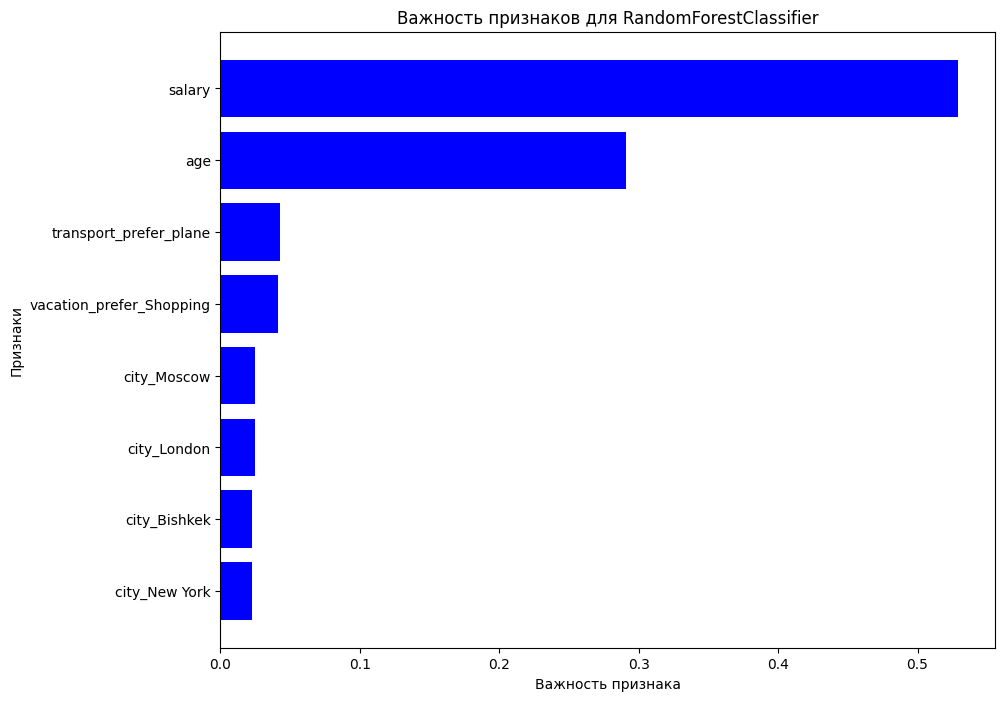

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('generated_vacation_data.csv')

df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'], drop_first=True)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

importances = model.feature_importances_

features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Сортировка по важности
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='blue')
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков для RandomForestClassifier')
plt.gca().invert_yaxis()  
plt.show()


In [40]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('generated_vacation_data.csv')

df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'], drop_first=True)

X = df.drop('target', axis=1)
y = df['target']

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(random_state=42)

feature_weights = {
    'salary': 8,   
    'age': 2     
}

X_weighted = X * [feature_weights.get(col, 1) for col in X.columns]

cv_scores = cross_val_score(model, X_weighted, y, cv=skf, scoring='accuracy')
print(f"Средняя точность по стратифицированной кросс-валидации с новыми весами: {cv_scores.mean():.4f}")

model = RandomForestClassifier(random_state=42, n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X_weighted, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Точность модели после обучения с новыми весами: {accuracy:.4f}")


Средняя точность по стратифицированной кросс-валидации с новыми весами: 0.2730
Точность модели после обучения с новыми весами: 0.2350


# Вывод

Точность модели равна 0.2350
У модели слабая способность правильно классифицировать объекты из-за абсолютной рандомности данных.

<h2> Попытки улучшить модель: </h2>
Средняя точность по обычной кросс-валидации: 0.2838
Средняя точность по стратифицированной кросс-валидации: 0.2975
Эти результаты подтверждают, что модель потенциально может быть улучшена, так как она показывает наибольшую точность при стратифицированной кросс-валидации. Но точность до сих пор явялется неточной.

Лучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} 
– выбранные настройки должеы значительно улучшить общую производительность модели. Выбранные параметры обычно обеспечивают лучшее разделение объектов на классы и снижают переобучение модели. Несмотря на настройку гиперпараметров, точность модели осталась на том же уровне — 0.2350.
Это говорит о том, что сама архитектура модели или структура данных может быть недостаточно сильной для данного набора задач

Так же была попытка улучшения модели посредством увеличения веса параметров которые наибольшим образом влияют на решение модели.
Но этот метод оказался полностью неэффектиным ибо точность модели осталась такая же:  0.2350, а Средняя точность по стратифицированной кросс-валидации с новыми весами: 0.2730 и вовсе снизилась.

В конченом итоге данные являются абсолютно рандомными и закнономерности явяются лишь совпадением. Модель может быть улучшена, но не значительно и 
качество её остаётся слабым
